# Customer Purchase Behavior Analysis using Descriptive Statistics

## Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import zscore
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [7]:
df = pd.read_csv("Superstore Marketing Data - Sheet1.csv")

In [12]:
df

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0   6/16/2014        0       189  ...              111   
1            0   6/15/2014        0       464  ...                7   
2            1   5/13/2014        0       134  ...               15   
3            1    ########        0        10  ...                0   
4            0    ########        0         6  ...               11   
...        ...         ...      ...       ...  ...              ...   
2235         1    ########       99       372  ...               47   
2236         0   1/22/2013       99         5  ...                3   
2237         0    ########       99       185  ...               15   
2238         0  11/29/2012       99       267  ...              149   
2239         2    ########       99       169  ...              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1                4   
1                    0            37                  1                7   
2                    2            30                  1                3   
3                    0             0                  1                1   
4                    0            34                  2                3   
...                ...           ...                ...              ...   
2235                48            78                  2                5   
2236                 8            16                  1                1   
2237                 5            14                  2                6   
2238               165            63                  1                5   
2239                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                       4                  6                  1         1   
1                       3                  7                  5         1   
2                       2                  5                  2         0   
3                       0                  2                  7         0   
4                       1                  2                  7         1   
...                   ...                ...                ...       ...   
2235                    2                 11                  4         0   
2236                    0                  3                  8         0   
2237                    1                  5                  8         0   
2238                    4                 10                  3         0   
2239                    5                  4                  7         1   

      Complain  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[2240 rows x 22 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

<h1 align=center>1. From this much i can understand that 'Income' colume as 24 missing columns.</h1>
<h1 align=center>2. Converting datatype of 'Dt_Customer' to a 'datetime' object for better analysis.</h1>
<h1 align=center>3. Calculating 'Age' as '2024 - Year_Birth'.</h1>
<h1 align=center>4. Creating 'TotalChildren' by adding 'Kidhome + Teenhome'.</h1>
<h1 align=center>5. Create 'YearsAsCustomer' as the difference between the current year and the year of 'Dt_Customer'.</h1>
<h1 align=center>6. For columns like 'Income' and 'Age'. Checking for extreme outliers using the IQR method or boxplot and cap them if required.</h1>
<h1 align=center>7. Columns like 'Id' may not be relevant for analysis.</h1>

<style>
    body {
        background-color: black; /* Set black background for the body */
        color: white; /* Default text color to white */
    }

    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>


In [15]:
# Adding values to Income columns
df['Income'] = df['Income'].fillna(df['Income'].median())

# Converting datatype of Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Calculating Age
df['Age'] = 2024 - df['Year_Birth']

# Creating TotalChildren
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Creating YearAsCustomer
df['YearsAsCustomer'] = 2024 - df['Dt_Customer'].dt.year

# Droping unwanted columns
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])


In [19]:
df.isnull().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer            916
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Response                 0
Complain                 0
Age                      0
TotalChildren            0
YearsAsCustomer        916
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          1324 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

<h1 align=center>Handling Dt_customer entries</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.1); /* Slightly scale up the text on hover */
    }
</style>

In [23]:
# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Handle invalid dates
earliest_date = df['Dt_Customer'].min(skipna=True)

# Replace missing values in Dt_Customer
df['Dt_Customer'] = df['Dt_Customer'].fillna(earliest_date)

# Recalculate YearsAsCustomer
current_year = pd.Timestamp.now().year
df['YearsAsCustomer'] = current_year - df['Dt_Customer'].dt.year

# Verify missing values
print(df.isnull().sum())


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
Age                    0
TotalChildren          0
YearsAsCustomer        0
dtype: int64


In [24]:
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1970  Graduation       Divorced  84835.0        0         0   
1           1961  Graduation         Single  57091.0        0         0   
2           1958  Graduation        Married  67267.0        0         1   
3           1967  Graduation       Together  32474.0        1         1   
4           1989  Graduation         Single  21474.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1976         PhD       Divorced  66476.0        0         1   
2236        1977    2n Cycle        Married  31056.0        1         0   
2237        1976  Graduation       Divorced  46310.0        1         0   
2238        1978  Graduation        Married  65819.0        0         0   
2239        1969         PhD        Married  94871.0        0         2   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumDealsPurchases  \
0     2014-06-16        0       189        104  ...                  1   
1     2014-06-15        0       464          5  ...                  1   
2     2014-05-13        0       134         11  ...                  1   
3     2012-07-30        0        10          0  ...                  1   
4     2012-07-30        0         6         16  ...                  2   
...          ...      ...       ...        ...  ...                ...   
2235  2012-07-30       99       372         18  ...                  2   
2236  2013-01-22       99         5         10  ...                  1   
2237  2012-07-30       99       185          2  ...                  2   
2238  2012-11-29       99       267         38  ...                  1   
2239  2012-07-30       99       169         24  ...                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   4                    4                  6   
1                   7                    3                  7   
2                   3                    2                  5   
3                   1                    0                  2   
4                   3                    1                  2   
...               ...                  ...                ...   
2235                5                    2                 11   
2236                1                    0                  3   
2237                6                    1                  5   
2238                5                    4                 10   
2239                8                    5                  4   

      NumWebVisitsMonth  Response  Complain  Age  TotalChildren  \
0                     1         1         0   54              0   
1                     5         1         0   63              0   
2                     2         0         0   66              1   
3                     7         0         0   57              2   
4                     7         1         0   35              1   
...                 ...       ...       ...  ...            ...   
2235                  4         0         0   48              1   
2236                  8         0         0   47              1   
2237                  8         0         0   48              1   
2238                  3         0         0   46              0   
2239                  7         1         0   55              2   

      YearsAsCustomer  
0                  10  
1                  10  
2                  10  
3                  12  
4                  12  
...               ...  
2235               12  
2236               11  
2237               12  
2238               12  
2239               12  

[2240 rows x 24 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

## Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [27]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1970  Graduation       Divorced  84835.0        0         0   
1        1961  Graduation         Single  57091.0        0         0   
2        1958  Graduation        Married  67267.0        0         1   
3        1967  Graduation       Together  32474.0        1         1   
4        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumDealsPurchases  \
0  2014-06-16        0       189        104  ...                  1   
1  2014-06-15        0       464          5  ...                  1   
2  2014-05-13        0       134         11  ...                  1   
3  2012-07-30        0        10          0  ...                  1   
4  2012-07-30        0         6         16  ...                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   Response  Complain  Age  TotalChildren  YearsAsCustomer  
0         1         0   54              0               10  
1         1         0   63              0               10  
2         0         0   66              1               10  
3         0         0   57              2               12  
4         1         0   35              1               12  

[5 rows x 24 columns]

In [37]:
# Central Tendency
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]  # Mode may have multiple values

# Dispersion
variance_values = df.var(numeric_only=True)
std_dev_values = df.std(numeric_only=True)

# Create a summary table
summary_table = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Variance': variance_values,
    'Std Dev': std_dev_values
})

summary_table


Mean   Median     Mode      Variance  \
Year_Birth            1968.805804   1970.0   1976.0  1.436179e+02   
Income               52237.975446  51381.5  51381.5  6.268992e+08   
Kidhome                  0.444196      0.0      0.0  2.898725e-01   
Teenhome                 0.506250      0.0      0.0  2.965219e-01   
Recency                 49.109375     49.0     56.0  8.388237e+02   
MntWines               303.935714    173.5      2.0  1.132978e+05   
MntFruits               26.302232      8.0      0.0  1.581926e+03   
MntMeatProducts        166.950000     67.0      7.0  5.094743e+04   
MntFishProducts         37.525446     12.0      0.0  2.984325e+03   
MntSweetProducts        27.062946      8.0      0.0  1.704080e+03   
MntGoldProds            44.021875     24.0      1.0  2.721442e+03   
NumDealsPurchases        2.325000      2.0      1.0  3.733542e+00   
NumWebPurchases          4.084821      4.0      2.0  7.721252e+00   
NumCatalogPurchases      2.662054      2.0      0.0  8.544517e+00   
NumStorePurchases        5.790179      5.0      3.0  1.056873e+01   
NumWebVisitsMonth        5.316518      6.0      7.0  5.888606e+00   
Response                 0.149107      0.0      0.0  1.269309e-01   
Complain                 0.009375      0.0      0.0  9.291257e-03   
Age                     55.194196     54.0     48.0  1.436179e+02   
TotalChildren            0.950446      1.0      1.0  5.652075e-01   
YearsAsCustomer         11.384821     12.0     12.0  5.378669e-01   

                          Std Dev  
Year_Birth              11.984069  
Income               25037.955891  
Kidhome                  0.538398  
Teenhome                 0.544538  
Recency                 28.962453  
MntWines               336.597393  
MntFruits               39.773434  
MntMeatProducts        225.715373  
MntFishProducts         54.628979  
MntSweetProducts        41.280498  
MntGoldProds            52.167439  
NumDealsPurchases        1.932238  
NumWebPurchases          2.778714  
NumCatalogPurchases      2.923101  
NumStorePurchases        3.250958  
NumWebVisitsMonth        2.426645  
Response                 0.356274  
Complain                 0.096391  
Age                     11.984069  
TotalChildren            0.751803  
YearsAsCustomer          0.733394

<h1 align=center>High standard deviation (25037.96) relative to the mean (52237.98) suggests significant variability.</h1>
<h1 align=center>MntWines: Mean is 303.94, Std Dev is 336.60, which suggests the distribution may include extreme values.</h1>
<h1 align=center>Recency: Wide range indicated by the standard deviation (28.96) relative to the mean (49.11).</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

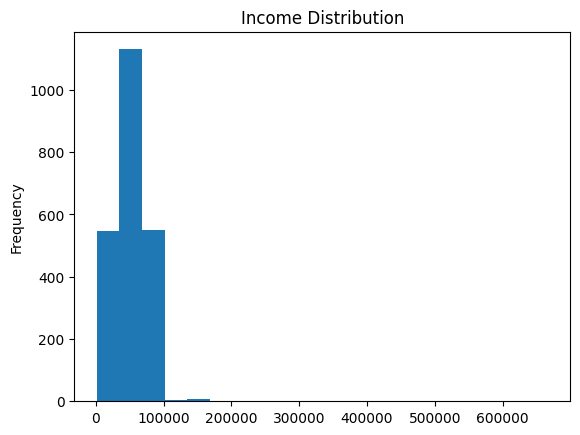

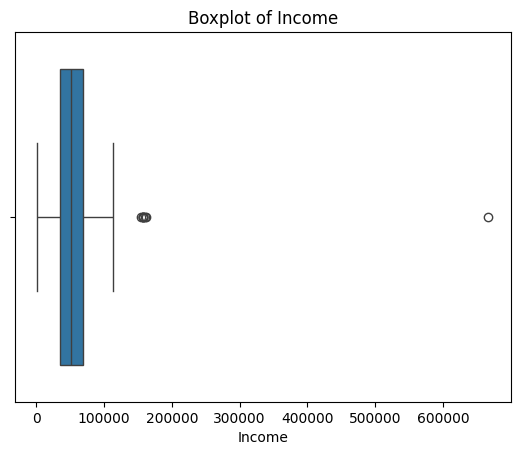

In [38]:
# Histogram
df['Income'].plot(kind='hist', bins=20, title='Income Distribution')
plt.show()

# Box Plot
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()


<h1 align=center>Confirming Outliers using:</h1>
<h1 align=center>1. IQR(Interquartile Range) Method</h1>
<h1 align=center>2. Z-Score Method</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

In [ ]:
# IQR Method
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Outliers in Income: {len(outliers)}")               # Will print number of outlier

# Z-Score method
from scipy.stats import zscore

df['MntWines_zscore'] = zscore(df['MntWines'])
outliers = df[df['MntWines_zscore'].abs() > 3]
print(f"Outliers in MntWines: {len(outliers)}")             # Will print number of outlier


Outliers in Income: 8
Outliers in MntWines: 16


<h1 align=center>Now That i have found a outlier, lets handle it</h1>
<h1 align=center>1. Visualize the Outliers</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

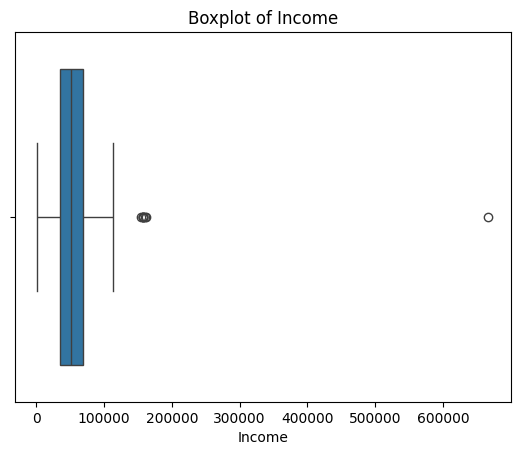

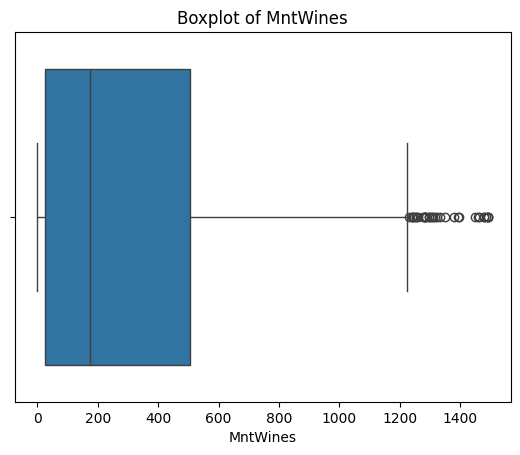

In [46]:
# Plotting boxplots to visualize outliers in Income and MntWines
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

sns.boxplot(x=df['MntWines'])
plt.title('Boxplot of MntWines')
plt.show()


<h1 align=center>2. Remove Outliers</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

In [50]:
# Calculate IQR for MntWines
Q1_mnt = df['MntWines'].quantile(0.25)
Q3_mnt = df['MntWines'].quantile(0.75)
IQR_mnt = Q3_mnt - Q1_mnt

# Define the bounds for MntWines
lower_bound_mnt = Q1_mnt - 1.5 * IQR_mnt
upper_bound_mnt = Q3_mnt + 1.5 * IQR_mnt

# Now, remove outliers based on these bounds for both Income and MntWines
df_cleaned = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]
df_cleaned = df_cleaned[(df_cleaned['MntWines'] >= lower_bound_mnt) & (df_cleaned['MntWines'] <= upper_bound_mnt)]


In [51]:
# Apply log transformation to Income and MntWines
df['Income'] = np.log1p(df['Income'])  # Log(Income + 1)
df['MntWines'] = np.log1p(df['MntWines'])


In [52]:
# Recalculating statistics after outlier handling
df_cleaned.describe()

Year_Birth         Income      Kidhome     Teenhome  \
count  2205.000000    2205.000000  2205.000000  2205.000000   
mean   1968.869388   51429.791837     0.450340     0.508390   
min    1893.000000    1730.000000     0.000000     0.000000   
25%    1959.000000   35196.000000     0.000000     0.000000   
50%    1970.000000   51267.000000     0.000000     0.000000   
75%    1977.000000   67445.000000     1.000000     1.000000   
max    1996.000000  117416.250000     2.000000     2.000000   
std      11.937230   20776.497525     0.539633     0.543521   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2205  2205.000000  2205.000000  2205.000000   
mean   2013-02-24 23:30:36.734693888    49.124717   287.463946    26.244898   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2012-07-30 00:00:00    24.000000    23.000000     1.000000   
50%              2012-11-19 00:00:00    49.000000   169.000000     8.000000   
75%              2013-09-16 00:00:00    74.000000   483.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1224.000000   199.000000   
std                              NaN    28.954582   312.408756    39.831130   

       MntMeatProducts  MntFishProducts  ...  NumWebPurchases  \
count      2205.000000      2205.000000  ...      2205.000000   
mean        163.343764        37.279819  ...         4.057143   
min           0.000000         0.000000  ...         0.000000   
25%          15.000000         3.000000  ...         2.000000   
50%          64.000000        12.000000  ...         3.000000   
75%         218.000000        49.000000  ...         6.000000   
max        1725.000000       259.000000  ...        27.000000   
std         224.111779        54.702546  ...         2.772434   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Response  \
count          2205.000000        2205.000000        2205.000000  2205.000000   
mean              2.609524           5.763265           5.330159     0.142404   
min               0.000000           0.000000           0.000000     0.000000   
25%               0.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               4.000000           8.000000           7.000000     0.000000   
max              28.000000          13.000000          20.000000     1.000000   
std               2.901498           3.254790           2.427875     0.349543   

          Complain          Age  TotalChildren  YearsAsCustomer  \
count  2205.000000  2205.000000    2205.000000      2205.000000   
mean      0.009524    55.130612       0.958730        11.383220   
min       0.000000    28.000000       0.000000        10.000000   
25%       0.000000    47.000000       0.000000        11.000000   
50%       0.000000    54.000000       1.000000        12.000000   
75%       0.000000    65.000000       1.000000        12.000000   
max       1.000000   131.000000       3.000000        12.000000   
std       0.097146    11.937230       0.749847         0.735161   

       MntWines_zscore  
count      2205.000000  
mean         -0.048947  
min          -0.903167  
25%          -0.834821  
50%          -0.400971  
75%           0.532102  
max           2.734037  
std           0.928345  

[8 rows x 23 columns]

<h1 align=center>visualizing the data</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

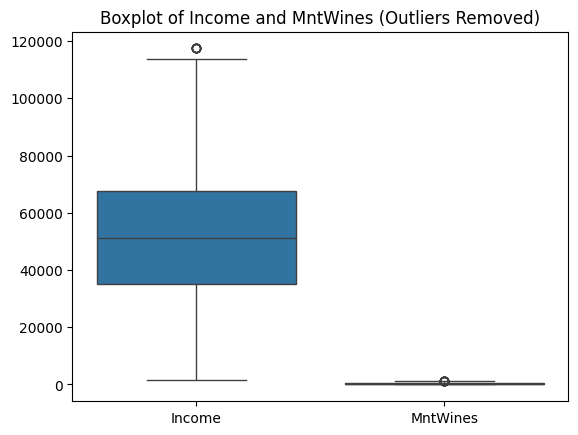

In [53]:
# Plotting boxplot for selected columns (e.g., Income and MntWines)
sns.boxplot(data=df_cleaned[['Income', 'MntWines']])
plt.title('Boxplot of Income and MntWines (Outliers Removed)')
plt.show()


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

<h1 align=center>1. Visualizing Distributions</h1>
<h1 align=center>2. Testing for Normality</h1>
<h1 align=center>3. Calculating Probabilities and Expected Values</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

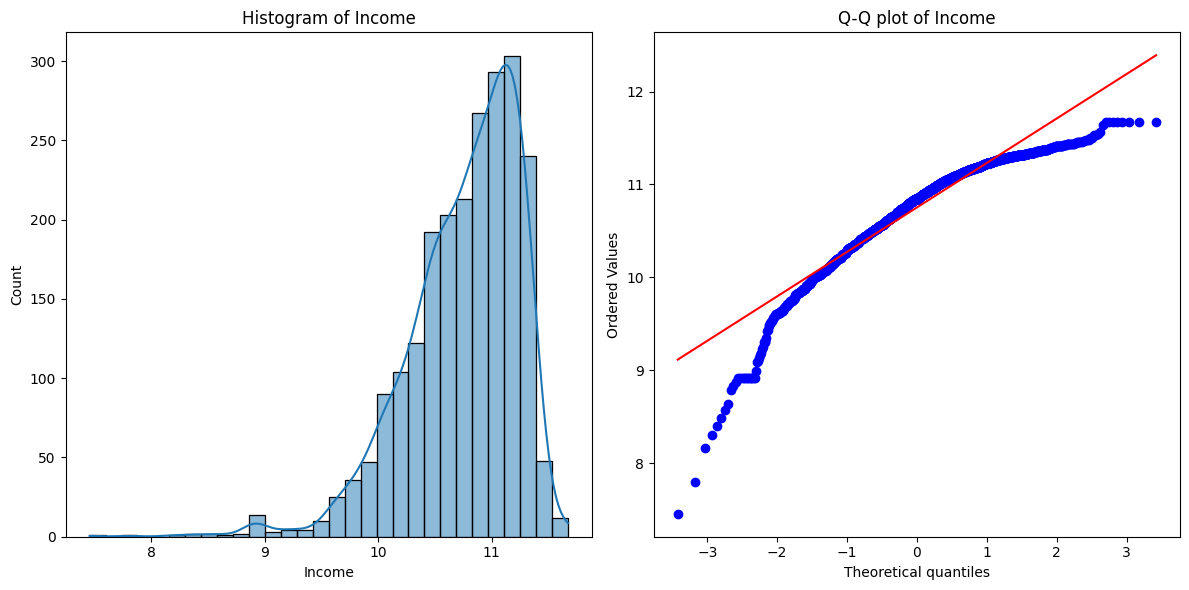

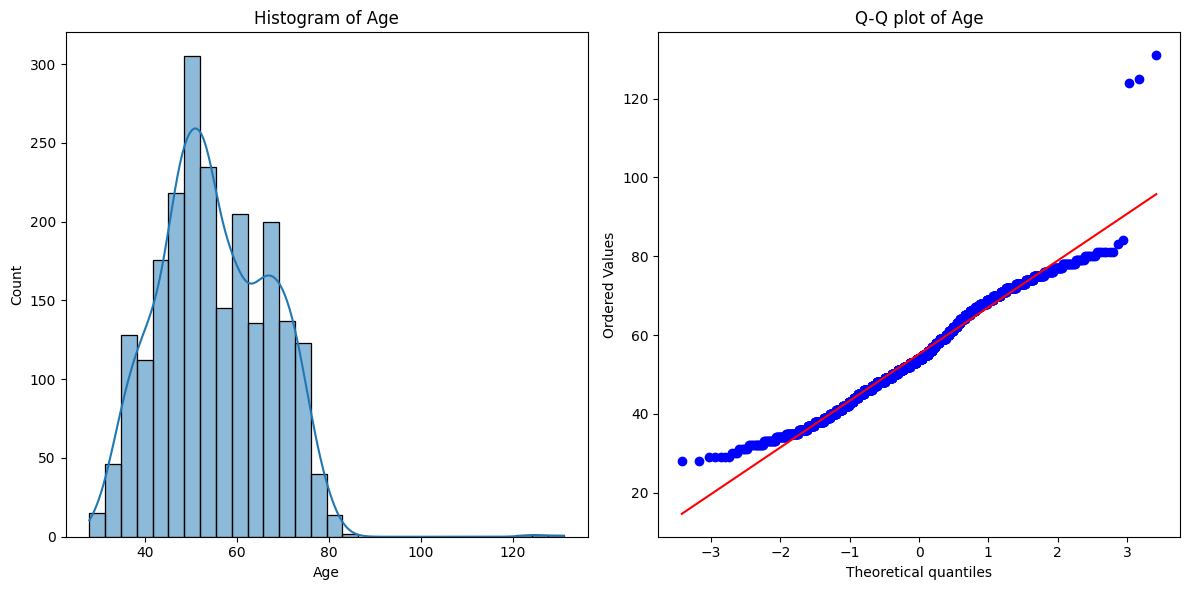

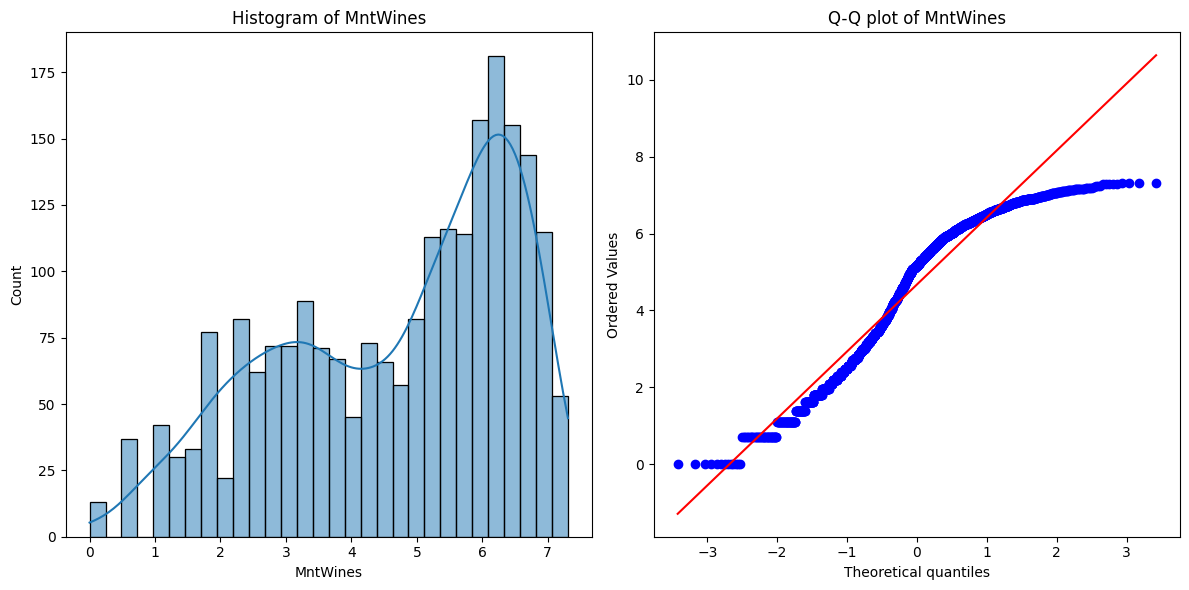

In [54]:
# Visualizing Distributions
import scipy.stats as stats

variables = ['Income', 'Age', 'MntWines']

# Plotting histograms and Q-Q plots for normality check
for var in variables:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {var}')
    
    plt.tight_layout()
    plt.show()


In [55]:
# Testing for normality
# Shapiro-Wilk Test for normality
for var in variables:
    stat, p_value = stats.shapiro(df[var].dropna())
    print(f'{var} - Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p_value:.4f}')
    if p_value > 0.05:
        print(f'{var} appears to follow a normal distribution.\n')
    else:
        print(f'{var} does NOT follow a normal distribution.\n')

Income - Shapiro-Wilk Test: Stat=0.9191, p-value=0.0000
Income does NOT follow a normal distribution.

Age - Shapiro-Wilk Test: Stat=0.9757, p-value=0.0000
Age does NOT follow a normal distribution.

MntWines - Shapiro-Wilk Test: Stat=0.9309, p-value=0.0000
MntWines does NOT follow a normal distribution.



In [56]:
# Log transformation (add a small constant to avoid log(0))
df['Income_log'] = np.log(df['Income'] + 1)
df['MntWines_log'] = np.log(df['MntWines'] + 1)

# Re-run Shapiro-Wilk Test for transformed variables
for var in ['Income_log', 'MntWines_log']:
    stat, p_value = stats.shapiro(df[var].dropna())
    print(f'{var} - Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p_value:.4f}')


Income_log - Shapiro-Wilk Test: Stat=0.8980, p-value=0.0000
MntWines_log - Shapiro-Wilk Test: Stat=0.8656, p-value=0.0000


In [60]:
import numpy as np
from scipy.stats import shapiro, boxcox

# Square Root Transformation
df['Income_sqrt'] = np.sqrt(df['Income'])
df['MntWines_sqrt'] = np.sqrt(df['MntWines'])

# Re-run Shapiro-Wilk Test for Square Root Transformed Variables
print("Square Root Transformation Results:")
for var in ['Income_sqrt', 'MntWines_sqrt']:
    stat, p_value = shapiro(df[var].dropna())
    print(f'{var} - Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p_value:.4f}')

# Box-Cox Transformation (add 1 to avoid zero)
df['Income_boxcox'], _ = boxcox(df['Income'] + 1)  
df['MntWines_boxcox'], _ = boxcox(df['MntWines'] + 1)

# Re-run Shapiro-Wilk Test for Box-Cox Transformed Variables
print("\nBox-Cox Transformation Results:")
for var in ['Income_boxcox', 'MntWines_boxcox']:
    stat, p_value = shapiro(df[var].dropna())
    print(f'{var} - Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p_value:.4f}')


Square Root Transformation Results:
Income_sqrt - Shapiro-Wilk Test: Stat=0.9080, p-value=0.0000
MntWines_sqrt - Shapiro-Wilk Test: Stat=0.8896, p-value=0.0000

Box-Cox Transformation Results:
Income_boxcox - Shapiro-Wilk Test: Stat=0.9885, p-value=0.0000
MntWines_boxcox - Shapiro-Wilk Test: Stat=0.9413, p-value=0.0000


<h1 align=center>Although the Box-Cox transformation did improve the normality of the distribution of Income, the p-value is still extremely low (p-value = 0.0000), meaning we cannot reject the null hypothesis that the data does not follow a normal distribution.</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

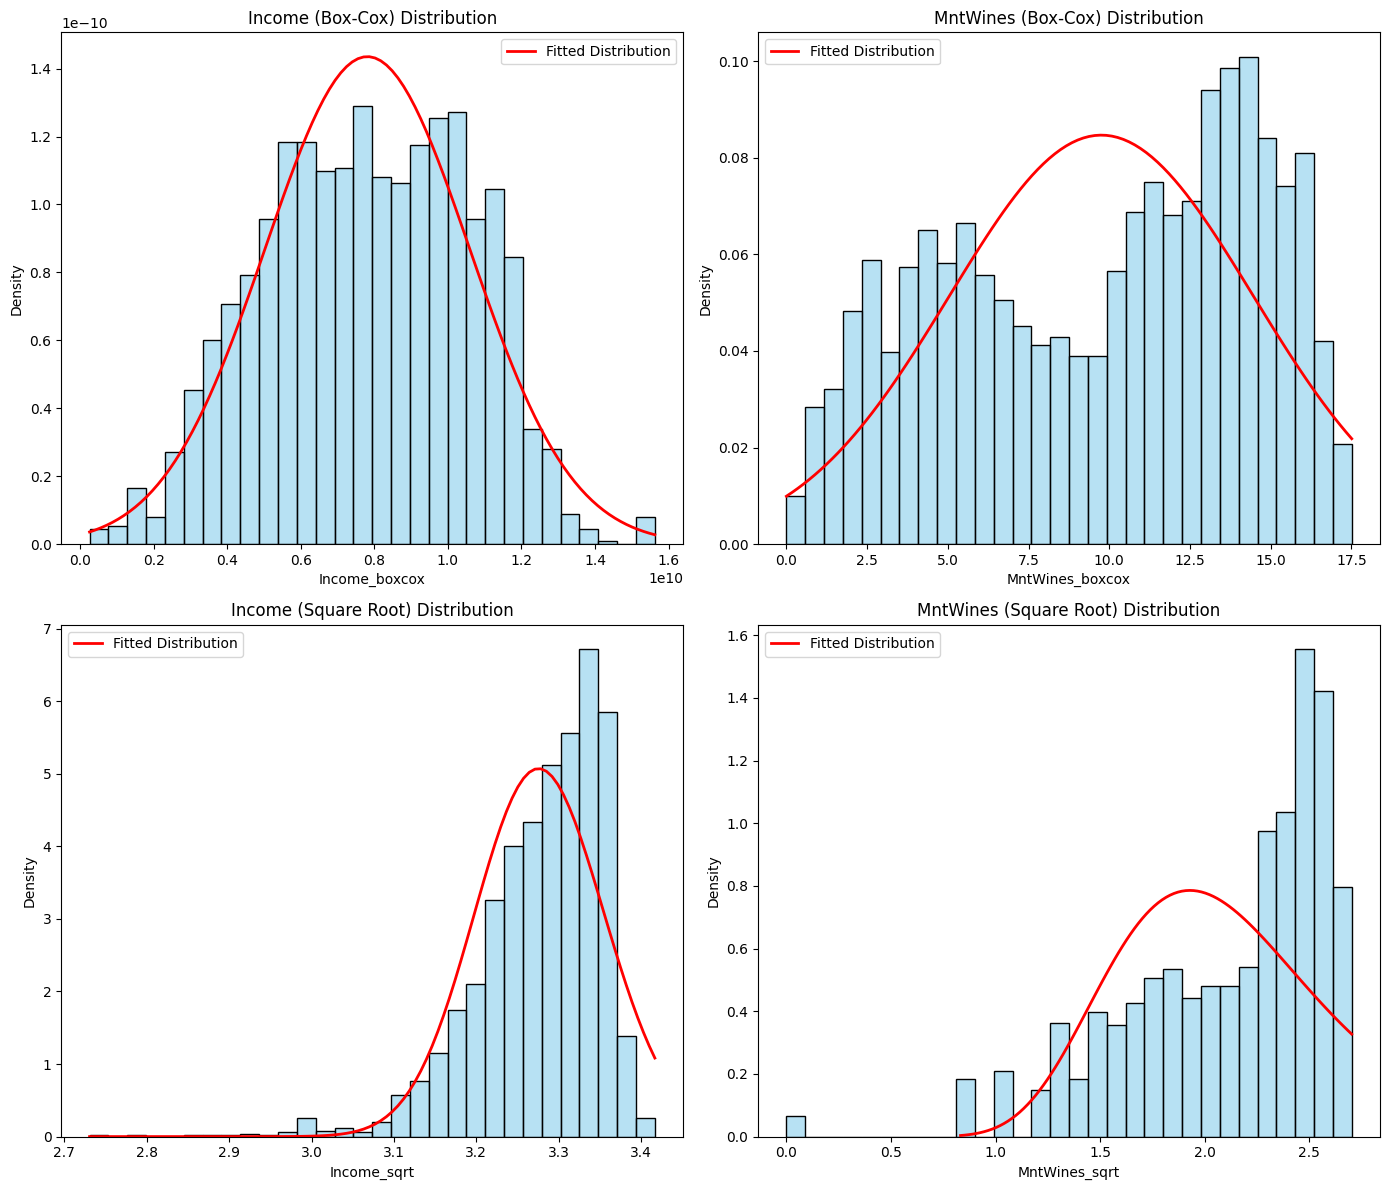

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, lognorm

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# List of transformed variables
transformed_vars = ['Income_boxcox', 'MntWines_boxcox', 'Income_sqrt', 'MntWines_sqrt']
titles = ['Income (Box-Cox)', 'MntWines (Box-Cox)', 'Income (Square Root)', 'MntWines (Square Root)']

# Plot each transformed variable
for i, var in enumerate(transformed_vars):
    ax = axes.flatten()[i]
    
    # Plot the histogram of the transformed variable
    sns.histplot(df[var], kde=False, bins=30, color='skyblue', ax=ax, stat="density", alpha=0.6)

    # Fit a normal distribution and plot its PDF for Box-Cox transformed variables
    if 'boxcox' in var:
        loc, scale = norm.fit(df[var].dropna())  # Fit a normal distribution (mean, std)
        x = np.linspace(min(df[var].dropna()), max(df[var].dropna()), 100)
        pdf = norm.pdf(x, loc, scale)
    else:
        # For square root transformation, ensure data is > 0 for lognormal fitting
        transformed_data = df[var].dropna()
        transformed_data = transformed_data[transformed_data > 0]  # Remove zeros or negative values

        # Fit a log-normal distribution only if the data is valid (i.e., > 0)
        if len(transformed_data) > 0:
            shape, loc, scale = lognorm.fit(transformed_data, floc=0)  # Fit a log-normal distribution
            x = np.linspace(min(transformed_data), max(transformed_data), 100)
            pdf = lognorm.pdf(x, shape, loc, scale)
        else:
            pdf = np.zeros_like(x)

    # Plot the theoretical PDF
    ax.plot(x, pdf, 'r-', lw=2, label="Fitted Distribution")
    ax.set_title(f'{titles[i]} Distribution')
    ax.legend()

# Display the plots
plt.tight_layout()
plt.show()


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   float64       
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [76]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'Education' and 'Marital_Status'
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

# Check the transformed data
print(df[['Education', 'Marital_Status']].head())


   Education  Marital_Status
0          2               2
1          2               4
2          2               3
3          2               5
4          2               4


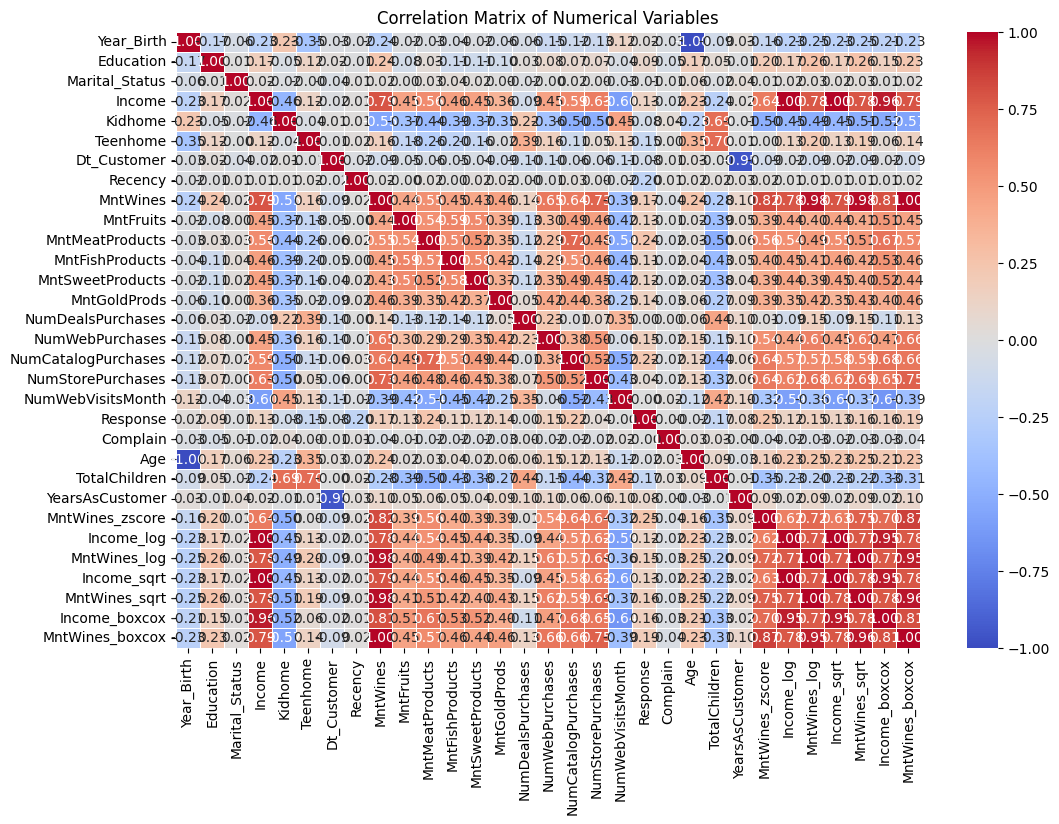

In [77]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


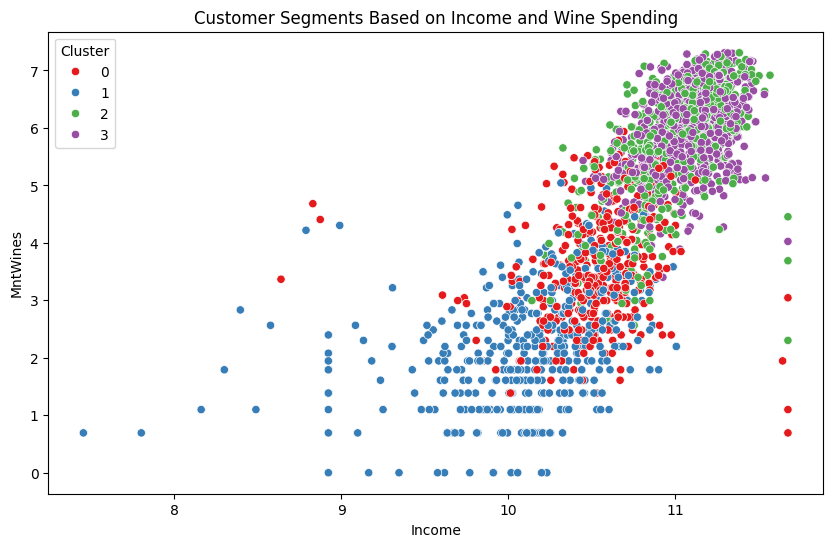

Cluster Centers:
[[-0.43725595 -0.60805527  0.09180244  0.74834119 -0.38905377]
 [-1.27207056 -1.34587049 -0.68356874 -0.78840039  0.04955255]
 [ 0.49200652  0.57410123  0.51845332  0.13665156  1.09683884]
 [ 0.68025204  0.75631049 -0.01992012 -0.00259164 -0.70713935]]


In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_cols = ['Income', 'MntWines', 'Age', 'Education', 'Marital_Status']
X = df[clustering_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 4 clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Income and Wine Spending')
plt.show()

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


In [79]:
# Group by clusters and calculate the mean for each feature
cluster_summary = df.groupby('Cluster')[clustering_cols].mean()
cluster_summary


Income  MntWines        Age  Education  Marital_Status
Cluster                                                           
0        10.536282  3.580543  56.261614   3.237164        3.310513
1        10.119175  2.245852  47.004090   1.507157        3.783231
2        10.998315  5.708968  61.405990   2.547421        4.910150
3        11.092289  6.038810  54.971660   2.388664        2.968961

<h1 align=center>0. This cluster consists of middle-aged individuals with moderate income and average spending on wines. They might have a certain level of education and are likely to be married (based on the marital status encoding).</h1>
<h1 align=center>1. This cluster represents individuals with slightly lower income and wine spending than Cluster 0. The average age is also younger, with a likely higher proportion of individuals having lower education levels. They may also be more likely to be married.</h1>
<h1 align=center>2. This cluster represents older individuals with higher wine spending and higher income. They are likely to have a moderate education level, and the marital status encoding suggests they may be divorced or widowed.</h1>
<h1 align=center>3. This group consists of older, wealthier individuals with the highest wine spending. They are more likely to have a certain education level and may have a more diverse marital status distribution (more likely married or separated).</h1>

<style>
    h1 {
        color: #8FBABC; /*Default color: Watchet*/
        font-size: 24px;
        transition: color 0.2s ease-in-out, transform 0.2s ease-in-out; /* Smooth color and scaling effect */
    }

    h1:hover {
        color: cyan; /* Hover color: cyan */
        transform: scale(1.01); /* Slightly scale up the text on hover */
    }
</style>

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

In [83]:
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder on the 'Education' column
label_encoder_education = LabelEncoder()
df['Education'] = label_encoder_education.fit_transform(df['Education'])

# Fit the label encoder on the 'Marital_Status' column
label_encoder_marital = LabelEncoder()
df['Marital_Status'] = label_encoder_marital.fit_transform(df['Marital_Status'])


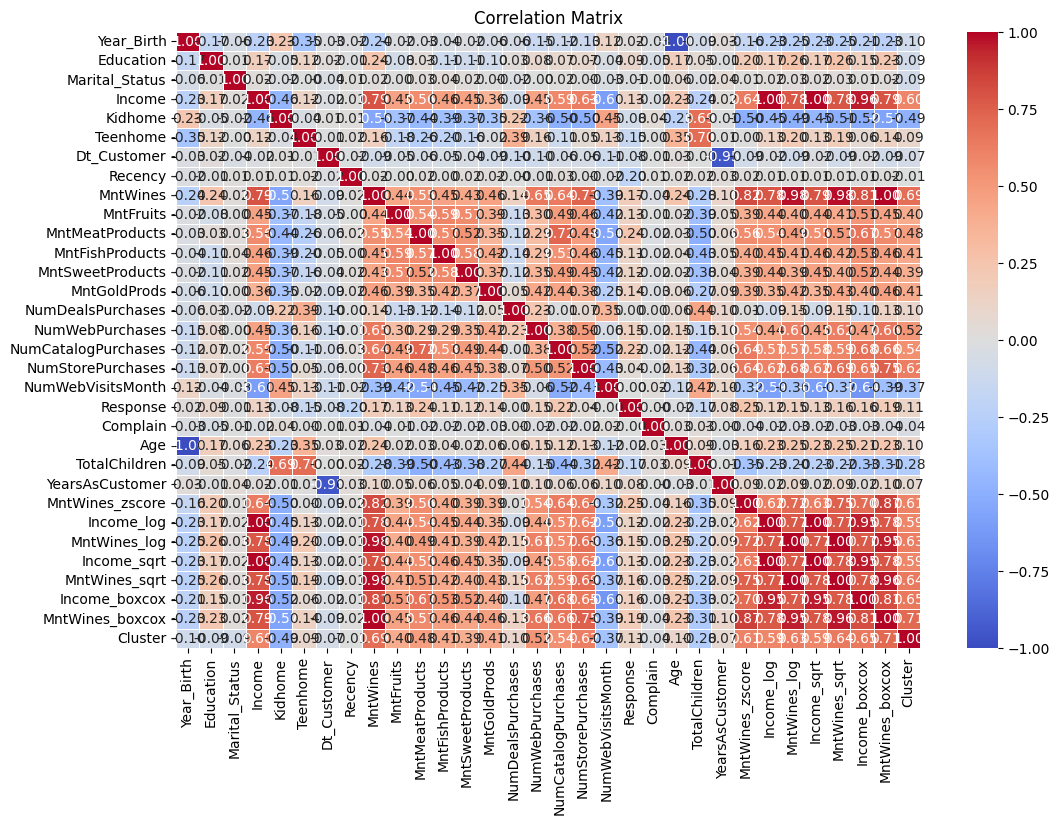

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


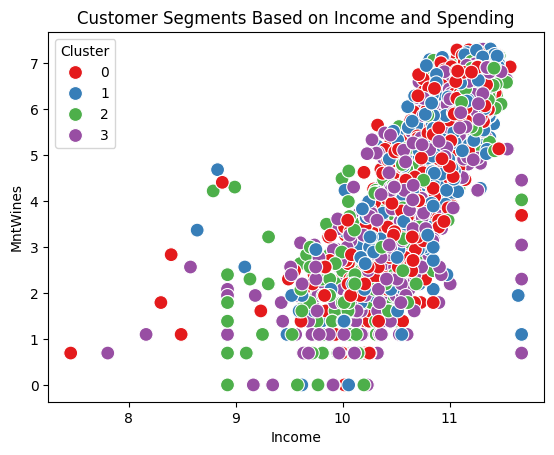

In [85]:
from sklearn.cluster import KMeans

# Select numerical columns for clustering
features = df[['Income', 'MntWines', 'Age', 'Education', 'Marital_Status']]

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments Based on Income and Spending')
plt.show()


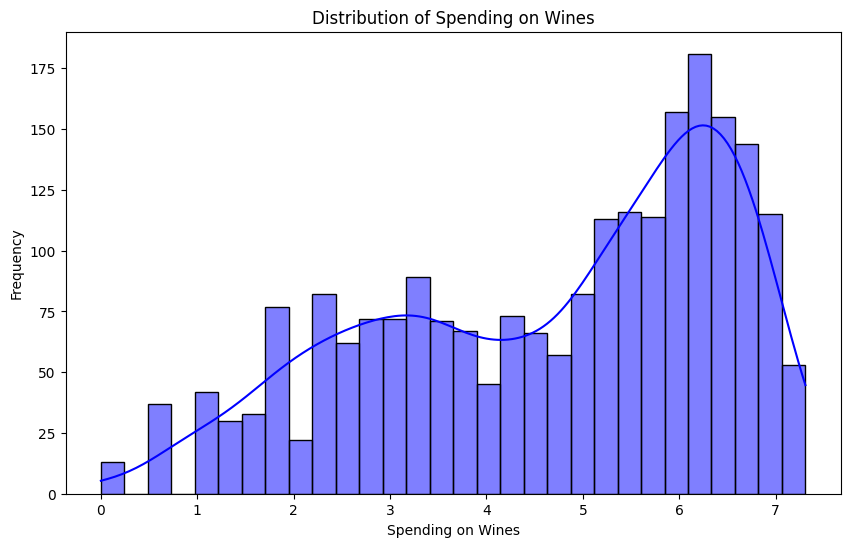

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MntWines'], bins=30, kde=True, color='blue')
plt.title('Distribution of Spending on Wines')
plt.xlabel('Spending on Wines')
plt.ylabel('Frequency')
plt.show()


/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_1590/3445892401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='Set1')


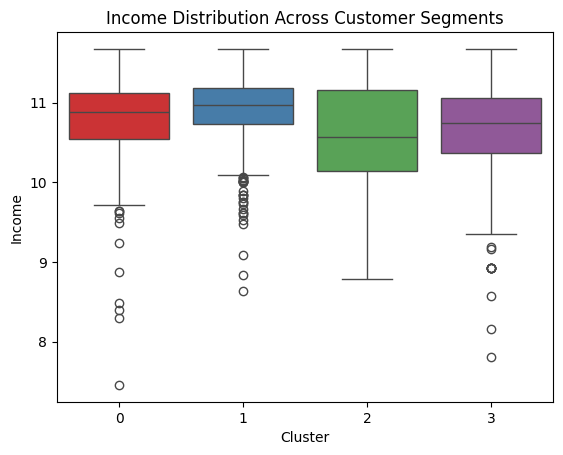

In [87]:
sns.boxplot(x='Cluster', y='Income', data=df, palette='Set1')
plt.title('Income Distribution Across Customer Segments')
plt.show()


   Year_Birth  Education  Marital_Status     Income  Kidhome  Teenhome  \
0        1970          2               2  11.348475        0         0   
1        1961          2               4  10.952419        0         0   
2        1958          2               3  11.116440        0         1   
3        1967          2               5  10.388226        1         1   
4        1989          2               4   9.974645        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  TotalChildren  \
0  2014-06-16        0  5.247024        104  ...              0   
1  2014-06-15        0  6.142037          5  ...              0   
2  2014-05-13        0  4.905275         11  ...              1   
3  2012-07-30        0  2.397895          0  ...              2   
4  2012-07-30        0  1.945910         16  ...              1   

   YearsAsCustomer  MntWines_zscore  Income_log  MntWines_log  Income_sqrt  \
0               10        -0.341540    2.513533      1.832105     3.368750

/var/folders/97/vtkzjx2x77s7sdnl9zk61nq00000gn/T/ipykernel_1590/1673263528.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='Set1')


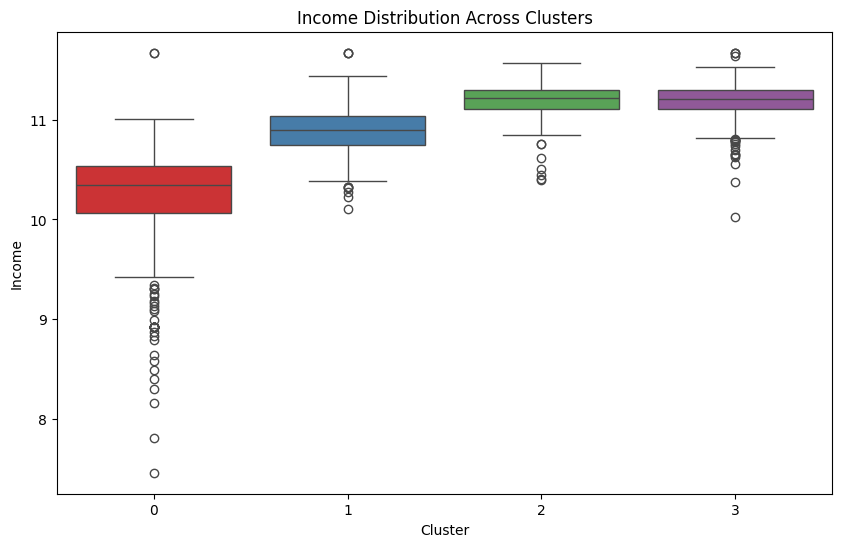

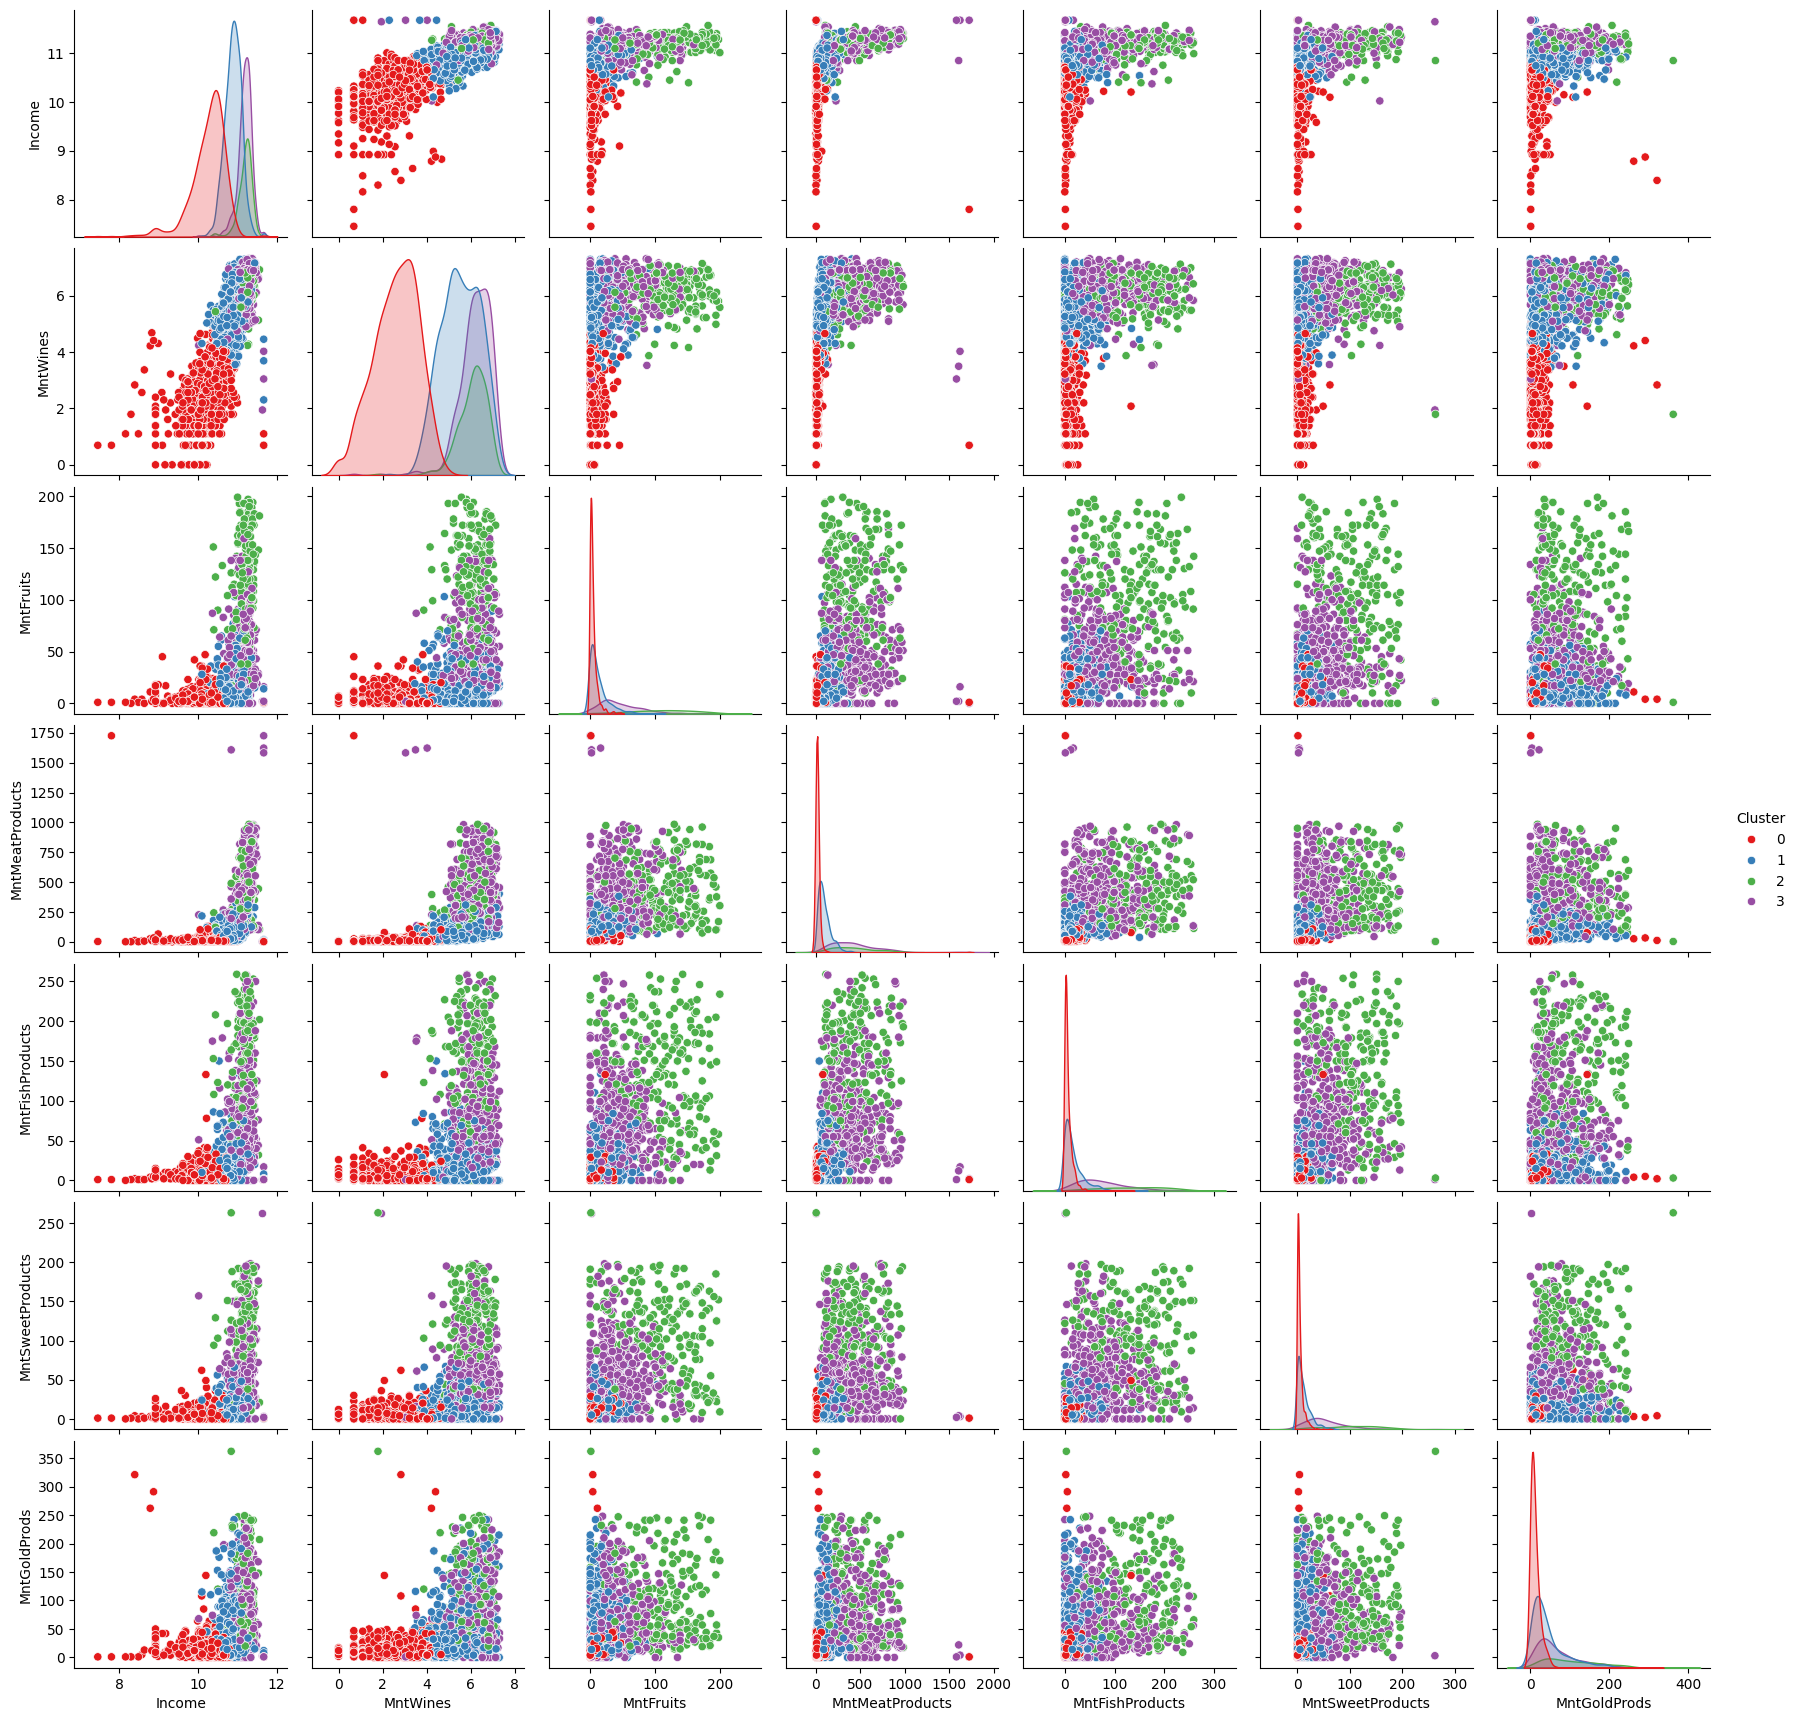

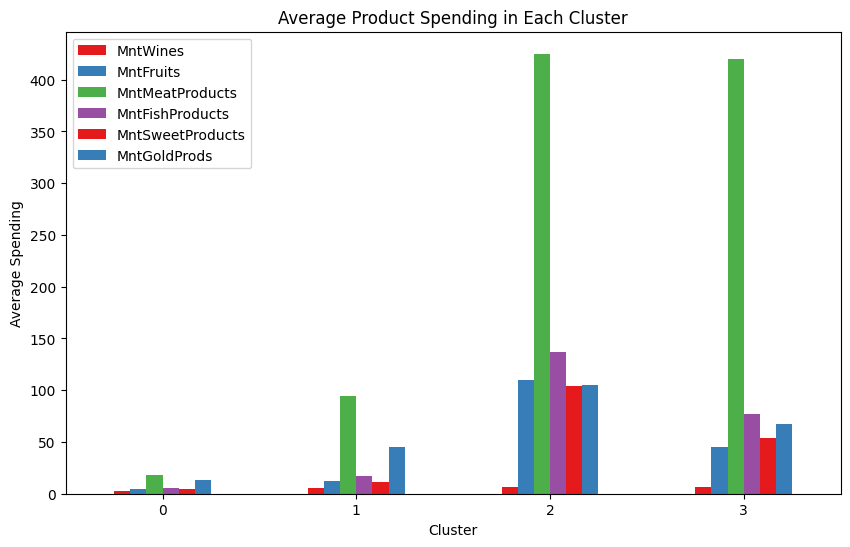

In [99]:
# Encode categorical columns 'Education' and 'Marital_Status'
label_encoder_education = LabelEncoder()
df['Education'] = label_encoder_education.fit_transform(df['Education'])

label_encoder_marital = LabelEncoder()
df['Marital_Status'] = label_encoder_marital.fit_transform(df['Marital_Status'])

# Standardize the relevant columns for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Verify that the 'Cluster' column is now added
print(df.head())

# Boxplot for Income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='Set1')
plt.title('Income Distribution Across Clusters')
plt.show()

# Pairplot for all spending columns and Income, colored by cluster
sns.pairplot(df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()

# Bar plot for average spending by cluster
cluster_avg_spending = df.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plot average spending for each cluster
cluster_avg_spending.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set1', len(cluster_avg_spending)))
plt.title('Average Product Spending in Each Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.show()



## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍